## Import

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

import pathlib
from typing import Any,Union   

2022-10-04 12:55:24.332007: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 12:55:24.624332: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-04 12:55:25.512053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-04 12:55:25.512104: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
print(tf.config.experimental.list_physical_devices())
print(tf.test.is_built_with_cuda())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


2022-10-04 12:55:26.910909: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 12:55:26.963325: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 12:55:26.963454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Def

In [3]:
BATCH_SIZE:int  = 64
IMG_HEIGHT:int  = 227
IMG_WIDTH:int   = 227

# Valdiate 20% 
VAL_SPLIT:float = 0.2

In [4]:
def get_dataset_dir(path) -> str:
    return pathlib.Path(path)

In [5]:
def load_dataset(dir) -> Union[list | Any, list | Any]:
  train_ds = tf.keras.utils.image_dataset_from_directory(
    dir,
    validation_split=VAL_SPLIT,
    # label_mode='binary',
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)
  val_ds = tf.keras.utils.image_dataset_from_directory(
    dir,
    validation_split=VAL_SPLIT,
    subset="validation",
    # label_mode='binary',
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)
  return train_ds, val_ds

## Load Dataset

In [6]:
data_dir:str = get_dataset_dir('data_categorical/train/')

train_ds, val_ds = load_dataset(data_dir)
class_names = train_ds.class_names

Found 33124 files belonging to 5 classes.
Using 26500 files for training.


2022-10-04 12:55:28.053414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 12:55:28.054565: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 12:55:28.054719: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 12:55:28.054815: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Found 33124 files belonging to 5 classes.
Using 6624 files for validation.


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

# Load datasets in cache to optimize 
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model

In [8]:
EPOCHS=1000

In [9]:
with tf.device('/GPU:0'):
    # Def model
    model = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        # tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),

        # tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
        # tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1,0.1),

        # Feature extraction
        # tf.keras.layers.Conv2D(16, 3, 2, activation='relu'),
        # tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(16, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(32, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(32, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        # Deep NN
        tf.keras.layers.Flatten(),
        # tf.keras.layers.Dense(512, activation='relu'),
        # tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.Dense(256, activation='relu'),
        # tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.Dense(64, activation='relu'),
        # tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.Dense(32, activation='relu'),
        # tf.keras.layers.Dropout(0.5),

        # tf.keras.layers.Dense(1, activation='sigmoid'),
        tf.keras.layers.Dense(len(class_names))

        # layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        # layers.Conv2D(16, 3, padding='same', activation='relu'),
        # layers.MaxPooling2D(),
        # #layers.Conv2D(16, 3, padding='same', activation='relu'),
        # #layers.MaxPooling2D(),
        # layers.Conv2D(32, 3, padding='same', activation='relu'),
        # layers.MaxPooling2D(),
        # layers.Conv2D(64, 3, padding='same', activation='relu'),
        # layers.MaxPooling2D(),
        # layers.Flatten(),
        # layers.Dense(128, activation='relu'),
        # layers.Dense(num_classes)
    ])

    # Compile model
    model.compile(optimizer='adamax', # or adam
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

    # model.summary()

## Train

In [10]:
with tf.device('/GPU:0'):
    history:tf.keras.callbacks.History = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS
    )

Epoch 1/1000


2022-10-04 12:55:32.225314: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-10-04 12:55:32.864834: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


164/415 [==========>...................] - ETA: 19s - loss: 1.6741 - accuracy: 0.4079

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


414/415 [============================>.] - ETA: 0s - loss: 1.3627 - accuracy: 0.5045

2022-10-04 12:56:08.197273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


415/415 [==============================] - 53s 120ms/step - loss: 1.3617 - accuracy: 0.5047 - val_loss: 0.9416 - val_accuracy: 0.6581
Epoch 2/1000
415/415 [==============================] - 13s 31ms/step - loss: 1.0165 - accuracy: 0.6175 - val_loss: 0.8149 - val_accuracy: 0.6914
Epoch 3/1000
415/415 [==============================] - 12s 28ms/step - loss: 0.9214 - accuracy: 0.6580 - val_loss: 0.8850 - val_accuracy: 0.6502
Epoch 4/1000
415/415 [==============================] - 7s 16ms/step - loss: 0.8764 - accuracy: 0.6643 - val_loss: 0.7309 - val_accuracy: 0.7038
Epoch 5/1000
415/415 [==============================] - 7s 16ms/step - loss: 0.8769 - accuracy: 0.6718 - val_loss: 0.7724 - val_accuracy: 0.7148
Epoch 6/1000
415/415 [==============================] - 6s 16ms/step - loss: 0.8186 - accuracy: 0.6732 - val_loss: 0.8384 - val_accuracy: 0.6729
Epoch 7/1000
415/415 [==============================] - 6s 16ms/step - loss: 0.8165 - accuracy: 0.6748 - val_loss: 0.6849 - val_accuracy: 0

KeyboardInterrupt: 

## Validate

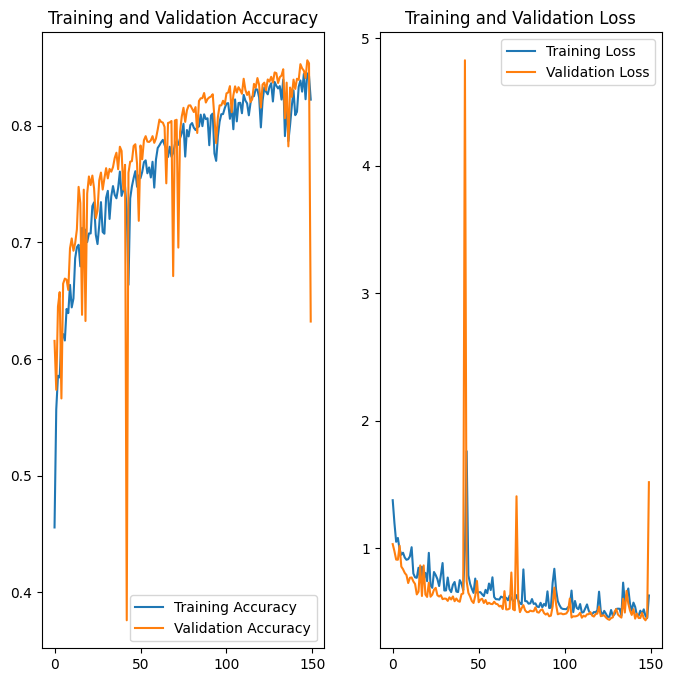

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Save

In [ ]:
import datetime
import pandas as pd

date:datetime = datetime.datetime.now().strftime("%m.%d.%Y_%H:%M:%S")
model_dir:str = f"models/categorical_{date}"
model.save(model_dir)
f = open(f"{model_dir}/model_summary.txt", "a")
model.summary(print_fn=lambda x: f.write(x + '\n'))
f.close()

f = open(f"{model_dir}/model_history.csv", "a")
f.write(pd.DataFrame.from_dict(history.history).to_csv(index=False))
f.close()

INFO:tensorflow:Assets written to: models/categorical_10.04.2022_12:43:36/assets


INFO:tensorflow:Assets written to: models/categorical_10.04.2022_12:43:36/assets


In [ ]:
# validation_path = pathlib.Path("data_categorical/validation")
# print(class_names)


# miss = {}
# for class_name in class_names:
#     miss[class_name] = 0

# for class_name in class_names:
#     err = 0
#     sum_perc = 0
#     notdef = 0
#     plt.figure(figsize=(100, 100))
#     for class_name_2 in class_names:
#         miss[class_name_2] = 0
#     for path in list(validation_path.glob(f"{class_name}/*.jpg")):
        
#         img = tf.keras.utils.load_img(
#             path, target_size=(IMG_HEIGHT, IMG_WIDTH)
#         )
#         img_array = tf.keras.utils.img_to_array(img)
#         img_array = tf.expand_dims(img_array, 0) # Create a batch

#         predictions = model.predict(img_array,verbose=0)
#         score = tf.nn.softmax(predictions[0])

#         miss[class_names[np.argmax(score)]] += 1
#         #if 100 * np.max(score) < 80:
#         #        notdef = notdef + 1
#         #else:

#         if class_name != class_names[np.argmax(score)]:
#             #print(
#             #    "{} {} with a {:.2f} percent confidence but is a {}"
#             #    .format(path, class_names[np.argmax(score)], 100 * np.max(score), class_name)
#             #)

#             err = err + 1
#             sum_perc = sum_perc + 100 * np.max(score)
#             if err <= 40:
#                 plt.subplot(5, 8, err)
#                 plt.imshow(img)
#                 plt.title(class_names[np.argmax(score)],fontsize=60)
#                 plt.axis("off")


#     len_class = len(list(validation_path.glob(f"{class_name}/*.jpg")))
#     if err > 0:
#         stat = ((len_class-err-notdef) / len_class) * 100
#         print(f"{class_name} {stat}% || {err} error || {notdef} nodef || {sum_perc/err}")
#     else:
#         stat = ((len_class-notdef) / len_class) * 100
#         print(f"{class_name} {stat}% || {notdef} nodef")
#     print(f"{class_name}",miss)
    
# plt.show()